In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("/content/sales_data.csv")

In [2]:
df.shape

(76000, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [4]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000
mean,301.062842,88.827316,89.090645,67.726028,9.087039,0.328947,69.454029,0.200000,104.317158
std,226.510161,43.994525,162.404627,39.377899,7.475781,0.469834,40.943818,0.400003,46.964801
min,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,4.290000,0.000000,4.000000
25%,136.000000,58.000000,0.000000,31.997500,5.000000,0.000000,32.620000,0.000000,71.000000
50%,227.000000,84.000000,0.000000,64.500000,10.000000,0.000000,65.700000,0.000000,100.000000
75%,408.000000,114.000000,121.000000,95.830000,10.000000,1.000000,97.932500,0.000000,133.000000
max,2267.000000,426.000000,1616.000000,228.030000,25.000000,1.000000,261.220000,1.000000,430.000000


In [5]:
df.dtypes

,0
Date,object
Store ID,object
Product ID,object
Category,object
Region,object
Inventory Level,int64
Units Sold,int64
Units Ordered,int64
Price,float64
Discount,int64


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [7]:
df = df.sort_values(['Store ID', 'Product ID', 'Date'])

In [8]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
100,2022-01-02,S001,P0001,Electronics,North,93,71,0,65.63,5,Snowy,0,73.66,Winter,0,84
200,2022-01-03,S001,P0001,Electronics,North,274,142,229,68.55,15,Snowy,1,80.73,Winter,0,132
300,2022-01-04,S001,P0001,Electronics,North,132,42,0,61.66,10,Snowy,0,54.88,Winter,0,67
400,2022-01-05,S001,P0001,Electronics,North,319,129,0,59.56,25,Snowy,1,57.34,Winter,0,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,2024-01-26,S005,P0020,Toys,North,99,99,133,34.99,0,Cloudy,0,37.50,Winter,0,134
75699,2024-01-27,S005,P0020,Toys,North,133,28,0,22.55,10,Snowy,0,26.95,Winter,0,38
75799,2024-01-28,S005,P0020,Toys,North,105,83,122,30.87,15,Cloudy,1,28.08,Winter,0,130
75899,2024-01-29,S005,P0020,Toys,North,144,112,94,31.95,5,Cloudy,0,31.33,Winter,0,105


In [9]:
# Forward fill per product-store time series
df['Demand'] = (
    df.groupby(['Store ID', 'Product ID'])['Demand']
      .transform(lambda x: x.fillna(method='ffill'))
)
# Drop still-missing
df = df.dropna(subset=['Demand'])

/tmp/ipython-input-4148543128.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method='ffill'))


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
categorical_col = ['Region', 'Category', 'Weather Condition', 'Seasonality']
label_encoder = LabelEncoder()
for cl in categorical_col:
  df[cl] = label_encoder.fit_transform(df[cl])

In [12]:
df.isnull().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Price,0
Discount,0


In [13]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week.astype(int)
df['dayofweek'] = df['Date'].dt.dayofweek
df['year'] = df['Date'].dt.year

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

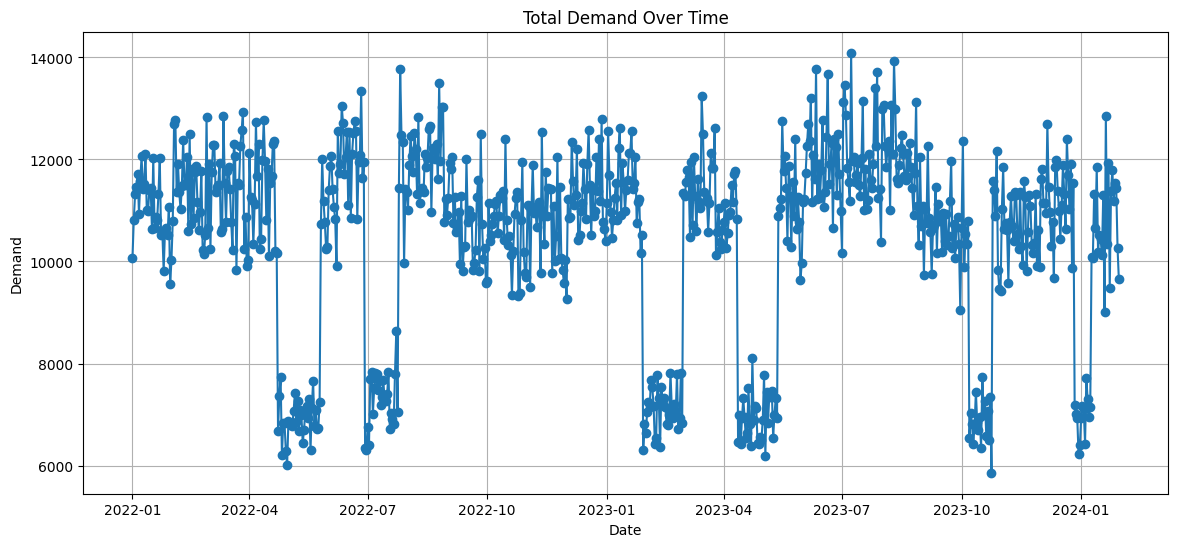

In [15]:
#plot for demand over time
plt.figure(figsize=(14, 6))
plt.plot(df.groupby('Date')['Demand'].sum(), marker='o')
plt.title("Total Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.grid(True)
plt.show()

Avg demand by day of week:
dayofweek
0    103.423303
1    103.665229
2    105.192037
3    104.408333
4    104.394444
5    104.484037
6    104.662294
Name: Demand, dtype: float64


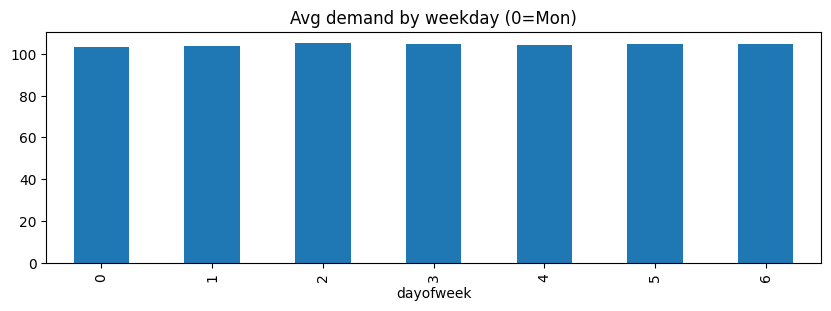

In [16]:
print("Avg demand by day of week:")
print(df.groupby('dayofweek')['Demand'].mean())

plt.figure(figsize=(10,3))
df.groupby('dayofweek')['Demand'].mean().plot(kind='bar')
plt.title("Avg demand by weekday (0=Mon)")
plt.show()

In [17]:
start_date = df['Date'].min()
print("Start date:", start_date)
print("Day of week (0=Mon):", start_date.weekday())

Start date: 2022-01-01 00:00:00
Day of week (0=Mon): 5


Avg demand by month:
month
1     106.040000
2      92.882500
3     113.613871
4      92.816667
5      86.521129
6     117.346000
7     101.561613
8     119.803387
9     107.431500
10     95.557258
11    107.542333
12    109.003226
Name: Demand, dtype: float64


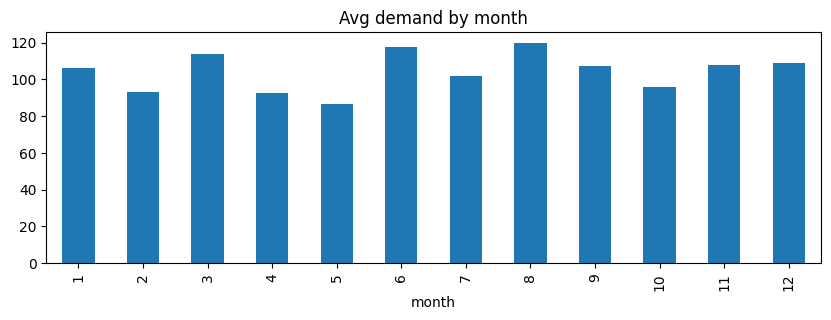

In [18]:
print("Avg demand by month:")
print(df.groupby('month')['Demand'].mean())

plt.figure(figsize=(10,3))
df.groupby('month')['Demand'].mean().plot(kind='bar')
plt.title("Avg demand by month")
plt.show()

Avg demand by year:
year
2022    105.826082
2023    103.323096
2024     98.053000
Name: Demand, dtype: float64


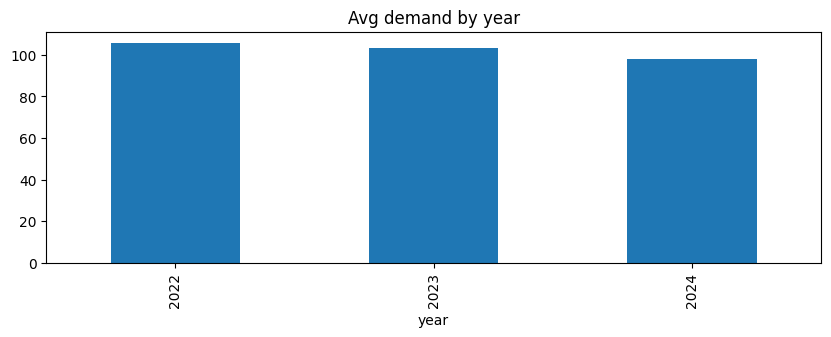

In [19]:
print("Avg demand by year:")
print(df.groupby('year')['Demand'].mean())

plt.figure(figsize=(10,3))
df.groupby('year')['Demand'].mean().plot(kind='bar')
plt.title("Avg demand by year")
plt.show()

#BASELINE MODELS

In [20]:
def train_test_split_ts(data, test_size=0.2):
    split = int(len(data) * (1 - test_size))
    return data.iloc[:split], data.iloc[split:]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [22]:
results = []

grouped = df.groupby(['Store ID', 'Product ID'])

In [23]:
for (store, product), group in grouped:

    if len(group) < 40:
        continue

    # Prepare data
    train, test = train_test_split_ts(group)
    y_train = train['Demand']
    y_test = test['Demand']

    # Linear Regression
    features = ['Price', 'Discount', 'Promotion', 'Competitor Pricing',
                'day', 'month', 'week', 'dayofweek']

    X_train = train[features]
    X_test = test[features]

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    lr_pred = lr.predict(X_test)

    # Holt-Winters
    hw_model = ExponentialSmoothing(
        y_train,
        trend='add',
        seasonal='add',
        seasonal_periods=7
    ).fit()

    hw_pred = hw_model.forecast(len(test))

    # ARIMA
    arima_model = ARIMA(y_train, order=(1,1,1)).fit()
    arima_pred = arima_model.forecast(len(test))

    # Prophet (Univariate)
    prophet_train = train[['Date', 'Demand']].rename(
        columns={'Date':'ds', 'Demand':'y'}
    )

    prophet_test = test[['Date']].rename(columns={'Date':'ds'})

    p_uni = Prophet()
    p_uni.fit(prophet_train)

    p_uni_pred = p_uni.predict(prophet_test)['yhat']

    # Prophet (Multivariate)
    p_multi = Prophet()

    regressors = ['Price', 'Discount', 'Promotion', 'Competitor Pricing']

    for reg in regressors:
        p_multi.add_regressor(reg)

    prophet_train_m = train[['Date', 'Demand'] + regressors]
    prophet_train_m = prophet_train_m.rename(
        columns={'Date':'ds', 'Demand':'y'}
    )

    prophet_test_m = test[['Date'] + regressors]
    prophet_test_m = prophet_test_m.rename(columns={'Date':'ds'})

    p_multi.fit(prophet_train_m)
    p_multi_pred = p_multi.predict(prophet_test_m)['yhat']

    models_preds = {
        'LinearRegression': lr_pred,
        'HoltWinters': hw_pred,
        'ARIMA': arima_pred,
        'Prophet_Univariate': p_uni_pred,
        'Prophet_Multivariate': p_multi_pred
    }

    for model_name, preds in models_preds.items():
        results.append({
            'Store ID': store,
            'Product ID': product,
            'Model': model_name,
            'MAPE': mean_absolute_percentage_error(y_test, preds),
            'R2': r2_score(y_test, preds)
        })


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the

In [24]:
results_df = pd.DataFrame(results)

# Average performance per model
results_df.groupby('Model')[['MAPE','R2']].mean().sort_values('MAPE')

,MAPE,R2
Model,,
LinearRegression,0.054379,0.985988
Prophet_Multivariate,0.055881,0.985160
ARIMA,0.641253,-0.289199
HoltWinters,0.655722,-0.375565
Prophet_Univariate,0.658694,-0.426890


In [25]:
best_models = (
    results_df.sort_values('MAPE')
              .groupby(['Store ID','Product ID'])
              .first()
)

best_models.head()

Model      MAPE        R2
Store ID Product ID                                          
S001     P0001           LinearRegression  0.045532  0.986872
         P0002       Prophet_Multivariate  0.040380  0.988485
         P0003           LinearRegression  0.052930  0.987043
         P0004           LinearRegression  0.044672  0.985865
         P0005       Prophet_Multivariate  0.039132  0.988507

#FINE-TUNED MODEL

In [26]:
df['Demand_log'] = np.log1p(df['Demand'])

In [27]:
def cap_outliers(series, q=0.99):
    cap = series.quantile(q)
    return np.where(series > cap, cap, series)

df['Demand_log'] = (
    df.groupby(['Store ID','Product ID'])['Demand_log']
      .transform(cap_outliers)
)

In [28]:
for lag in [1, 7, 14]:
    df[f'lag_{lag}'] = (
        df.groupby(['Store ID','Product ID'])['Demand_log']
          .shift(lag)
    )

In [29]:
df = df.dropna()

In [35]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Weather Condition', 'Promotion', 'Competitor Pricing', 'Seasonality',
       'Epidemic', 'Demand', 'day', 'month', 'week', 'dayofweek', 'year',
       'Demand_log', 'lag_1', 'lag_7', 'lag_14'],
      dtype='object')

In [36]:
from sklearn.linear_model import RidgeCV

# Re-create train and test splits from the dataframe with lag features
train, test = train_test_split_ts(df)

features = [
    'Price','Discount','Promotion','Competitor Pricing',
    'day','month','dayofweek',
    'lag_1','lag_7','lag_14'
]

X_train = train[features]
y_train = train['Demand_log']

ridge = RidgeCV(alphas=np.logspace(-3,3,20))
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]))

In [39]:
X_test = test[features]
pred_log = ridge.predict(X_test)
pred = np.expm1(pred_log)

y_test_demand = np.expm1(test['Demand_log']) # Inverse transform y_test_log
mape = mean_absolute_percentage_error(y_test_demand, pred)

In [40]:
mape

0.41308560876790096

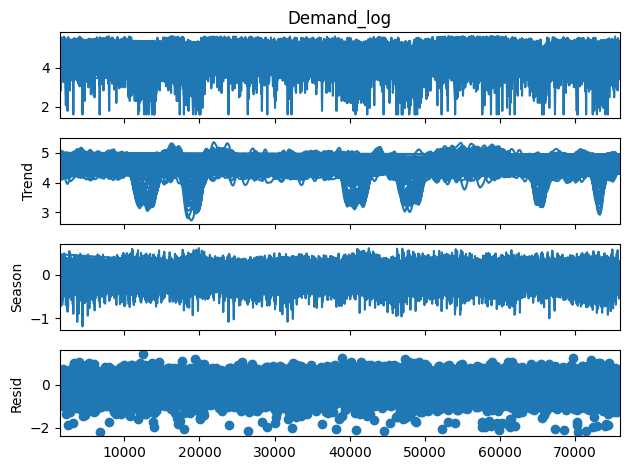

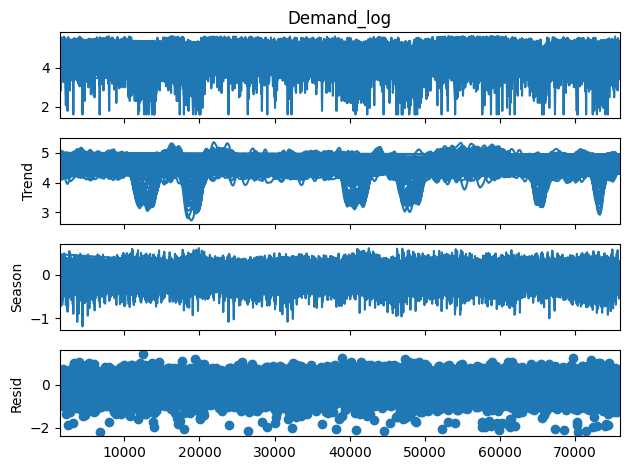

In [41]:
from statsmodels.tsa.seasonal import STL

stl = STL(y_train, period=7)
res = stl.fit()
res.plot()

In [42]:
configs = [
    ('add','add'),
    ('add','mul'),
    ('mul','add'),
    ('mul','mul')
]

best_mape = np.inf

for trend, season in configs:
    try:
        model = ExponentialSmoothing(
            y_train,
            trend=trend,
            seasonal=season,
            seasonal_periods=7
        ).fit()

        pred = np.expm1(model.forecast(len(test)))
        mape = mean_absolute_percentage_error(y_test, pred)

        if mape < best_mape:
            best_mape = mape
            best_hw = model
    except:
        pass

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:85: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.

In [43]:
mape

0.41308560876790096

In [44]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(y_train)
print("p-value:", adf[1])

p-value: 6.346865103701693e-30


In [47]:
p = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)

In [50]:
prophet_train_df = train[['Date', 'Demand_log']].rename(columns={'Date': 'ds', 'Demand_log': 'y'})
prophet_test_df = test[['Date']].rename(columns={'Date': 'ds'})

best_mape_prophet = np.inf
best_prophet_model = None

for cps in [0.01, 0.05, 0.1, 0.3]:
    p = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=cps
    )
    p.fit(prophet_train_df)
    forecast = p.predict(prophet_test_df)
    pred = np.expm1(forecast['yhat'])
    mape = mean_absolute_percentage_error(np.expm1(test['Demand_log']), pred)

    if mape < best_mape_prophet:
        best_mape_prophet = mape
        best_prophet_model = p

In [51]:
future = prophet_test_df
forecast = best_prophet_model.predict(future)

In [52]:
print(best_mape_prophet)

0.5341677015384174


In [53]:
df[['Price','Discount','Promotion','Demand_log']].corr()

,Price,Discount,Promotion,Demand_log
Price,1.000000,-0.094796,-0.043549,-0.005543
Discount,-0.094796,1.000000,0.784029,0.180681
Promotion,-0.043549,0.784029,1.000000,0.226456
Demand_log,-0.005543,0.180681,0.226456,1.000000


In [54]:
p = Prophet(changepoint_prior_scale=0.05)

p.add_regressor('Price', prior_scale=0.1)
p.add_regressor('Discount', prior_scale=0.3)

In [55]:
df['Promo_lag_7'] = df.groupby(['Store ID','Product ID'])['Promotion'].shift(7)

/tmp/ipython-input-494327864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo_lag_7'] = df.groupby(['Store ID','Product ID'])['Promotion'].shift(7)


In [56]:
import pandas as pd
import numpy as np
import itertools
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [57]:
def prepare_ts(df, store, product):
    ts = (
        df[(df['Store ID'] == store) & (df['Product ID'] == product)]
          .set_index('Date')['Demand']
          .asfreq('D')
          .fillna(method='ffill')
    )
    return np.log1p(ts)

In [58]:
def ts_split(ts, test_ratio=0.2):
    split = int(len(ts) * (1 - test_ratio))
    return ts[:split], ts[split:]

In [59]:
def get_d(series):
    p = adfuller(series)[1]
    return 0 if p <= 0.05 else 1

In [60]:
def tune_arima(train, d, p_range=(0,3), q_range=(0,3)):
    best_aic = np.inf
    best_order = None

    for p, q in itertools.product(range(*p_range), range(*q_range)):
        try:
            model = ARIMA(train, order=(p,d,q))
            fit = model.fit()
            if fit.aic < best_aic:
                best_aic = fit.aic
                best_order = (p,d,q)
        except:
            continue

    return best_order

In [61]:
def fit_forecast_arima(train, test, order):
    model = ARIMA(train, order=order)
    fit = model.fit()
    forecast_log = fit.forecast(len(test))

    forecast = np.expm1(forecast_log)
    actual = np.expm1(test)

    return actual, forecast, fit

In [62]:
def evaluate(actual, forecast):
    return {
        'MAPE': mean_absolute_percentage_error(actual, forecast),
        'R2': r2_score(actual, forecast)
    }

In [63]:
arima_results = []

for (store, product), _ in df.groupby(['Store ID','Product ID']):

    ts = prepare_ts(df, store, product)

    if len(ts) < 40:
        continue

    train, test = ts_split(ts)
    d = get_d(train)
    best_order = tune_arima(train, d)

    if best_order is None:
        continue

    actual, forecast, model = fit_forecast_arima(train, test, best_order)
    metrics = evaluate(actual, forecast)

    arima_results.append({
        'Store ID': store,
        'Product ID': product,
        'Model': 'ARIMA (Fine-Tuned)',
        'Order': best_order,
        **metrics
    })

In [64]:
arima_df = pd.DataFrame(arima_results)
arima_df.head()

,Store ID,Product ID,Model,Order,MAPE,R2
0,S001,P0001,ARIMA (Fine-Tuned),"(1, 0, 1)",0.426124,-0.022894
1,S001,P0002,ARIMA (Fine-Tuned),"(0, 0, 0)",0.390455,-0.000256
2,S001,P0003,ARIMA (Fine-Tuned),"(1, 0, 0)",0.468990,-0.074104
3,S001,P0004,ARIMA (Fine-Tuned),"(1, 0, 1)",0.435920,-0.039158
4,S001,P0005,ARIMA (Fine-Tuned),"(1, 0, 2)",0.405734,-0.001469


In [66]:
print("Fine-Tuned ARIMA Evaluation (Per Store–Product)\n")
print(
    arima_df[
        ['Store ID', 'Product ID', 'Order', 'MAPE', 'R2']
    ].sort_values('MAPE')
)

Fine-Tuned ARIMA Evaluation (Per Store–Product)

   Store ID Product ID      Order      MAPE        R2
59     S003      P0020  (0, 0, 0)  0.282380 -0.090995
35     S002      P0016  (1, 0, 1)  0.282473 -0.188368
38     S002      P0019  (2, 0, 2)  0.301342 -0.069841
47     S003      P0008  (1, 0, 2)  0.307873 -0.050269
8      S001      P0009  (2, 0, 2)  0.309570 -0.192415
..      ...        ...        ...       ...       ...
14     S001      P0015  (1, 0, 1)  0.824886 -0.046397
36     S002      P0017  (1, 0, 1)  0.882898  0.035741
95     S005      P0016  (1, 0, 1)  0.884282 -0.049109
96     S005      P0017  (1, 0, 1)  0.972263 -0.026138
16     S001      P0017  (1, 0, 1)  1.000965  0.003748

[100 rows x 5 columns]


In [67]:
print("\n📊 Overall Performance (Fine-Tuned ARIMA)\n")

print("Average MAPE :", arima_df['MAPE'].mean())
print("Median  MAPE :", arima_df['MAPE'].median())
print("Average R²   :", arima_df['R2'].mean())


📊 Overall Performance (Fine-Tuned ARIMA)

Average MAPE : 0.4955595357600454
Median  MAPE : 0.44006066227283364
Average R²   : -0.025231783161134124
